# Part 1: Analysis and Insights

# Task 1: Import the Dataset

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import os

# Define the path to the data folder

In [2]:
# Define the path to the data folder

path = r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\02 Data\Prepared Data'

# Load the merged dataset

In [3]:
# Load the merged dataset

merged_df = pd.read_pickle(os.path.join(path, 'orders_products_merged_with_customers.pkl'))

# Display the first few rows of the dataset to verify

In [6]:
# Display the first few rows of the dataset to verify

merged_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,_merge,...,mean_price,spending_flag,median_days_since_last_order,order_frequency_flag,gender,state,age,num_dependents,marital_status,income
0,2,33120.0,1.0,1.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119
1,2,28985.0,2.0,1.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119
2,2,9327.0,3.0,0.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119
3,2,45918.0,4.0,1.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119
4,2,30035.0,5.0,0.0,202279,3,5,9,8.0,both,...,8.618889,Low spender,24.0,Non-frequent customer,Male,Idaho,57,3,married,98119


In [7]:
merged_df.shape

(32641268, 30)

In [5]:
merged_df.dtypes

order_id                           int32
product_id                       float32
add_to_cart_order                float32
reordered                        float32
user_id                            int32
order_number                       int32
orders_day_of_week                 int32
order_hour_of_day                  int32
days_since_last_order            float32
_merge                          category
product_name                      object
aisle_id                         float64
department_id                    float64
prices                           float64
merge_flag                      category
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int32
loyalty_flag                      object
mean_price                       float64
spending_flag                     object
median_days_since_last_order     float32
order_frequency_flag              object
gender          

In [7]:
# Inorder to reduce memory consumption, the dataframe will be change to 32 bits
# Optional: convert float64 columns to float32 if precision allows
float64_columns_to_convert = ['aisle_id', 'department_id', 'prices', 'mean_price']
for column in float64_columns_to_convert:
    if merged_df[column].dtype == np.float64:
        merged_df[column] = merged_df[column].astype(np.float32)


In [8]:
merged_df.dtypes

order_id                           int32
product_id                       float32
add_to_cart_order                float32
reordered                        float32
user_id                            int32
order_number                       int32
orders_day_of_week                 int32
order_hour_of_day                  int32
days_since_last_order            float32
_merge                          category
product_name                      object
aisle_id                         float32
department_id                    float32
prices                           float32
merge_flag                      category
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int32
loyalty_flag                      object
mean_price                       float32
spending_flag                     object
median_days_since_last_order     float32
order_frequency_flag              object
gender          

# Task 2: Addressing Data Security Implications

# Task 3: Regional Segmentation

# 3.1 To create the "Region" column, it begins by organizing the states into separate lists based on their respective regions:

In [4]:
northeast_region = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [5]:
midwest_region = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [6]:
south_region = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [7]:
west_region = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

# 3.1.1 Create region column by assigning regions based on 'state' in each row:

In [8]:
merged_df.loc[merged_df['state'].isin(northeast_region), 'region'] = 'Northeast'

In [9]:
merged_df.loc[merged_df['state'].isin(midwest_region), 'region'] = 'Midwest'

In [10]:
merged_df.loc[merged_df['state'].isin(south_region), 'region'] = 'South'

In [11]:
merged_df.loc[merged_df['state'].isin(west_region), 'region'] = 'West'

In [12]:
# Assuming merged_df is my dataframe and I have created a series using value_counts

region_counts = merged_df['region'].value_counts(dropna = False)

In [13]:
# Convert the series to int32

region_counts_int32 = region_counts.astype('int32')

In [14]:
# Update the Dataframe column itself

merged_df['region_counts'] = region_counts_int32

In [43]:
# Print

region_counts_int32

region
South        10870719
West          8353182
Midwest       7652535
Northeast     5764832
Name: count, dtype: int32

In [36]:
# Check data frequency

merged_df['region'].value_counts(dropna = False)

region
South        10870719
West          8353182
Midwest       7652535
Northeast     5764832
Name: count, dtype: int64

# 3.1 Create a crosstab that compares the spending habits in different U.S. regions:

In [15]:
# create a crosstab between 'region' and 'spending_flag'

region_spending_crosstab = pd.crosstab(merged_df['region'], merged_df['spending_flag'], dropna = False)

In [16]:
# This could be copied to the clipboard and opened in Excel, but it should ideally be a short table that can be viewed right here.

region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,157347,7495188
Northeast,109159,5655673
South,211695,10659024
West,161834,8191348


# Task 4: Create an exclusion flag that will exclude Low-Activity Customers

In [17]:
# Ensure 'max_order' column is in the correct data type

merged_df['max_order'] = merged_df['max_order'].astype(int)

In [18]:
# Create exclusion flag based on 'max_order'

merged_df['exclusion_flag'] = np.where(merged_df['max_order'] < 5, 'Exclude', 'Keep')

In [20]:
# Filter the DataFrame to keep only customers with 'Keep' in the exclusion flag

filtered_new_df = merged_df[merged_df['exclusion_flag'] == 'Keep']

In [23]:
# Check the output of the first few rows of the filtered table

filtered_new_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,_merge,...,order_frequency_flag,gender,state,age,num_dependents,marital_status,income,region,region_counts,exclusion_flag
0,2,33120.0,1.0,1.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep
1,2,28985.0,2.0,1.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep
2,2,9327.0,3.0,0.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep
3,2,45918.0,4.0,1.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep
4,2,30035.0,5.0,0.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep


In [24]:
# Check frequencies

filtered_new_df['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
Keep    31929979
Name: count, dtype: int64

In [53]:
filtered_new_df.dtypes

order_id                           int32
product_id                       float32
add_to_cart_order                float32
reordered                        float32
user_id                            int32
order_number                       int32
orders_day_of_week                 int32
order_hour_of_day                  int32
days_since_last_order            float32
_merge                          category
product_name                      object
aisle_id                         float32
department_id                    float32
prices                           float32
merge_flag                      category
busiest_day                       object
busiest_days                      object
busiest_period_of_day             object
max_order                          int32
loyalty_flag                      object
mean_price                       float32
spending_flag                     object
median_days_since_last_order     float32
order_frequency_flag              object
gender          

In [25]:
# Check exclusion flag using crosstab

exclusion_flag_check = pd.crosstab(filtered_new_df['exclusion_flag'], filtered_new_df['max_order'], dropna = False)

In [26]:
exclusion_flag_check.to_clipboard()

In [27]:
# Check sample

filtered_new_df.shape

(31929979, 33)

In [28]:
filtered_new_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,_merge,...,order_frequency_flag,gender,state,age,num_dependents,marital_status,income,region,region_counts,exclusion_flag
0,2,33120.0,1.0,1.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep
1,2,28985.0,2.0,1.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep
2,2,9327.0,3.0,0.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep
3,2,45918.0,4.0,1.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep
4,2,30035.0,5.0,0.0,202279,3,5,9,8.0,both,...,Non-frequent customer,Male,Idaho,57,3,married,98119,West,NaN,Keep


I can fairly presume that this sample (filtered_new_df) contains just relevant data by removing any rows associated with customers who have placed fewer than five orders.

Since the number of rows in the dataset corresponds to the frequency of "keep" entries in the "Exclusion_Flag" column.

This ensures that the dataset only includes clients that are frequent platform users, offering a more accurate picture for research.

In [58]:
# Define the path for saving the filtered dataframe

filtered_new_output_path = r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\02 Data\Prepared Data\filtered_orders_products_merged.pkl'

In [59]:
# Export the filtered_new DataFrame as a pickle file

filtered_new_df.to_pickle(filtered_new_output_path)

# Task 5: Create Profiling Variables (Customer Profiling)

# Creating Profiling Variables

# 5.1. Creating Age Group Profiling

In [29]:
filtered_new_df.loc[filtered_new_df['age'] <= 25, 'age_group'] = 'Young Adult'

C:\Users\New User\AppData\Local\Temp\ipykernel_16032\371845396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_new_df.loc[filtered_new_df['age'] <= 25, 'age_group'] = 'Young Adult'


In [30]:
filtered_new_df.loc[(filtered_new_df['age'] > 25) & (filtered_new_df['age'] < 45), 'age_group'] = 'Adult'

In [31]:
filtered_new_df.loc[(filtered_new_df['age'] >= 45) & (filtered_new_df['age'] < 65), 'age_group'] = 'Older Adult'

In [32]:
filtered_new_df.loc[filtered_new_df['age'] >= 65, 'age_group'] = 'Senior'

In [33]:
# Check frequency of age_group and ensure no NaNs

print(filtered_new_df['age_group'].value_counts(dropna=False))

age_group
Older Adult    9990825
Adult          9501783
Senior         8450848
Young Adult    3986523
Name: count, dtype: int64


In [70]:
Older_Adult_data.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,_merge,...,gender,state,age,num_dependents,marital_status,income,region,region_counts,exclusion_flag,age_group
0,2,33120.0,1.0,1.0,202279,3,5,9,8.0,both,...,Male,Idaho,57,3,married,98119,West,NaN,Keep,Older Adult
1,2,28985.0,2.0,1.0,202279,3,5,9,8.0,both,...,Male,Idaho,57,3,married,98119,West,NaN,Keep,Older Adult
2,2,9327.0,3.0,0.0,202279,3,5,9,8.0,both,...,Male,Idaho,57,3,married,98119,West,NaN,Keep,Older Adult
3,2,45918.0,4.0,1.0,202279,3,5,9,8.0,both,...,Male,Idaho,57,3,married,98119,West,NaN,Keep,Older Adult
4,2,30035.0,5.0,0.0,202279,3,5,9,8.0,both,...,Male,Idaho,57,3,married,98119,West,NaN,Keep,Older Adult


In [73]:
Older_Adult_data['department_id'].unique()

array([16.,  4., 13.,  7.,  1., 18., 15., 12., 14.,  6., 17., 10., 19.,
       20.,  9.,  3., 11., nan,  8.,  2., 21.,  5.], dtype=float32)

# 5.2. Create income group profiling

In [34]:
filtered_new_df.loc[filtered_new_df['income'] <= 50000, 'income_group'] = 'Low'

C:\Users\New User\AppData\Local\Temp\ipykernel_16032\3357334251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_new_df.loc[filtered_new_df['income'] <= 50000, 'income_group'] = 'Low'


In [35]:
filtered_new_df.loc[(filtered_new_df['income'] > 50000) & (filtered_new_df['income'] <= 100000), 'income_group'] = 'Middle'

In [36]:
filtered_new_df.loc[filtered_new_df['income'] > 100000, 'income_group'] = 'High'

In [37]:
# Check frequency of income_group and ensure no NaNs

print(filtered_new_df['income_group'].value_counts(dropna=False))

income_group
High      14619171
Middle    13799735
Low        3511073
Name: count, dtype: int64


# 5.3. Create dependants flag

In [38]:
filtered_new_df.loc[filtered_new_df['num_dependents'] == 0, 'dependants_flag'] = 'No Dependants'
filtered_new_df.loc[filtered_new_df['num_dependents'] > 0, 'dependants_flag'] = 'Has Dependants'

C:\Users\New User\AppData\Local\Temp\ipykernel_16032\2253560447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_new_df.loc[filtered_new_df['num_dependents'] == 0, 'dependants_flag'] = 'No Dependants'


In [39]:
# Check data frequency

print(filtered_new_df['dependants_flag'].value_counts(dropna=False))

dependants_flag
Has Dependants    23950452
No Dependants      7979527
Name: count, dtype: int64


# Task 6: Create an appropriate visualization to show the distribution of profiles

In [40]:
# Create unique user_id sample and select only relevant columns

user_sample = filtered_new_df[['user_id', 'age_group', 'income_group', 'dependants_flag', 'region', 'order_frequency_flag']]

In [41]:
# Remove duplicate entries from the user_sample to get a sample of all unique customers.

user_sample = user_sample.drop_duplicates()

In [42]:
# Check the data output

user_sample

,user_id,age_group,income_group,dependants_flag,region,order_frequency_flag
0,202279,Older Adult,Middle,Has Dependants,West,Non-frequent customer
9,205970,Adult,High,Has Dependants,West,Frequent customer
17,178520,Senior,Middle,Has Dependants,Northeast,Frequent customer
30,156122,Adult,Middle,Has Dependants,South,Frequent customer
56,22352,Adult,Middle,Has Dependants,Midwest,Non-frequent customer
...,...,...,...,...,...,...
28576241,110510,Adult,Middle,Has Dependants,South,Frequent customer
28797713,109155,Adult,Middle,Has Dependants,Midwest,Regular customer
28956650,145450,Senior,High,Has Dependants,South,Regular customer
29510859,136567,Young Adult,Middle,Has Dependants,Northeast,Regular customer


# 6.1. Age Groups

 # Import visualization libraries

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [45]:
# Create a table of age_group counts

age_group_counts = user_sample['age_group'].value_counts()

In [46]:
# Print

age_group_counts

age_group
Older Adult    57045
Adult          54052
Senior         48424
Young Adult    22702
Name: count, dtype: int64

In [86]:
# Define a color-blind friendly palette (CUD colors)

colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7']

# Create a Pie Chart for Instacart Distribution of Customers by Age Group

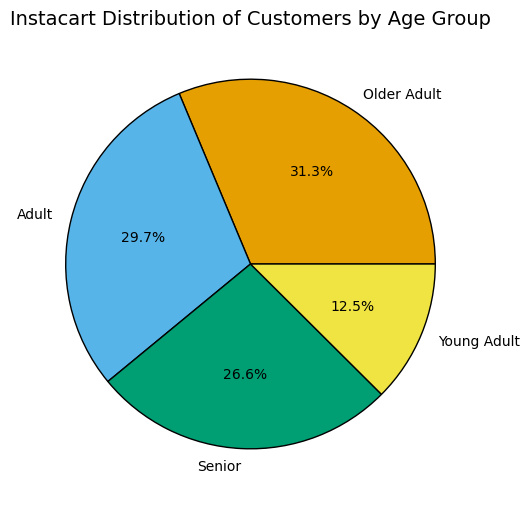

In [87]:
# Create the pie chart

plt.figure(figsize=(6, 6))  # Adjust size for better readability
plt.pie(age_group_counts, 
        labels=age_group_counts.index, 
        autopct='%.1f%%',  # Show percentage to 1 decimal place
        colors=colors,  # Use color-blind friendly palette
        wedgeprops={'edgecolor': 'black'})  # Borders for wedges

# Add title
plt.title('Instacart Distribution of Customers by Age Group', fontsize=14)

# Save the figure
output_path = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'customers_age_groups_pie.png')
plt.savefig(output_path, bbox_inches='tight')

# Show the pie chart
plt.show()

# 6.2. Income Groups

In [88]:
# Create a table to count the income_group occurrences (counts)

income_group_counts = user_sample['income_group'].value_counts()

In [89]:
income_group_counts

income_group
High      77929
Middle    75290
Low       29004
Name: count, dtype: int64

In [90]:
# Define the path for saving the plot

output_path = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'income_group_distribution_pie.png')

In [91]:
# Define a color-blind-friendly palette

cud_colors = ['#F1F7B5', '#A8D1D1', '#9EA1D4']

# Plot the pie chart for income groups

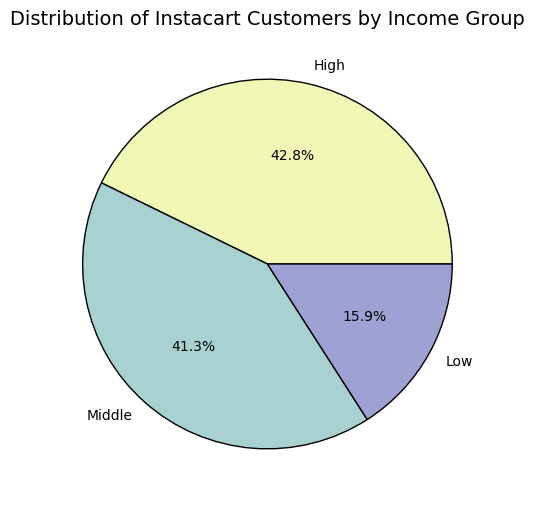

In [92]:
# Plot the pie chart for income groups

plt.figure(figsize=(6, 6))  # Control size of chart
plt.pie(income_group_counts, 
        labels=income_group_counts.index, 
        autopct='%.1f%%',  # Show percentage to 1 decimal place
        colors=cud_colors,  # Color palette
        wedgeprops={'edgecolor': 'black'})  # Borders

# Add title
plt.title('Distribution of Instacart Customers by Income Group', fontsize=14)

# Save the plot
plt.savefig(output_path, bbox_inches='tight')

# Show the plot
plt.show()

# Plot the distribution of income groups

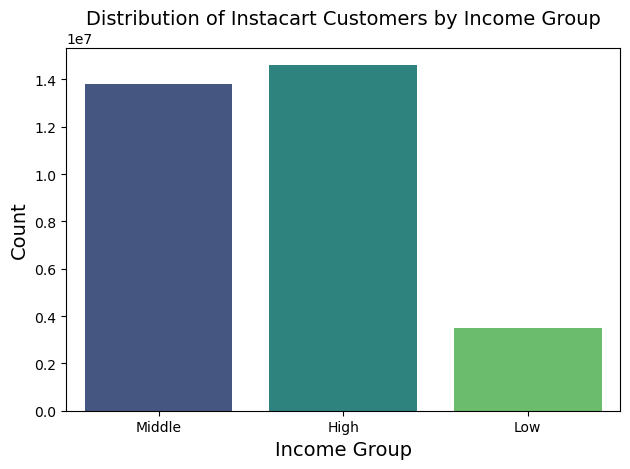

In [93]:
# Define the path for saving the plot

output_path = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'income_group_distribution_bar.png')

# Plot the distribution of income groups


sns.countplot(data=filtered_new_df, x='income_group', palette='viridis')

# Add title and labels
plt.title('Distribution of Instacart Customers by Income Group', fontsize=14)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adjust layout for better fit
plt.tight_layout()

# Save the plot
plt.savefig(output_path, bbox_inches='tight')

# 6.3. Customers with Dependants

In [94]:
# create a table of dependants_flag counts

dependants_flag_counts = user_sample['dependants_flag'].value_counts()

In [96]:
# Define the path for saving the plot

output_path_2 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'customers_dependants_pie.png')

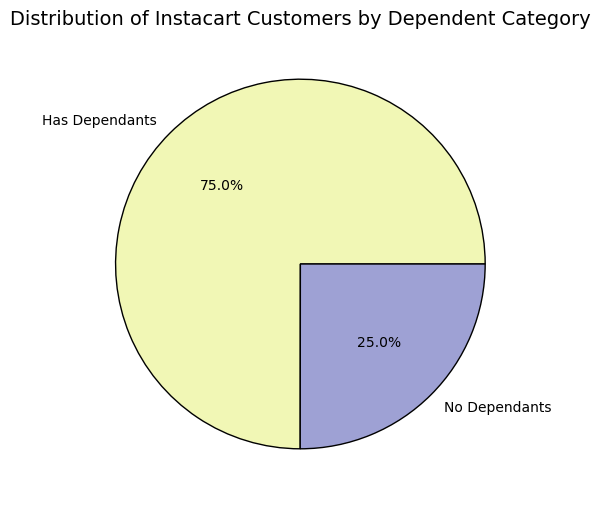

In [97]:
# Pie chart

plt.figure(figsize=(6, 6)) # Control size of chart
plt.pie(dependants_flag_counts, 
        labels = dependants_flag_counts.index, 
        autopct='%.1f%%', # Show percentage to 1 decimal place
        colors = ['#F1F7B5', '#9EA1D4'],
        wedgeprops = {'edgecolor' : 'black'}) # Borders
plt.title('Distribution of Instacart Customers by Dependent Category',fontsize=14)

# Save the plot
plt.savefig(output_path_2, bbox_inches='tight')

# Show the plot
plt.show()

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [47]:
# Create an aggregate subset of data where the 'prices' column is the total cost of each order:

orders_subset = filtered_new_df.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'region', 'order_frequency_flag', 'order_number', 'days_since_last_order'])['prices'].sum().reset_index()

In [48]:
# Rename 'prices' to 'order_total'

orders_subset.rename(columns = {'prices' : 'order_total'}, inplace = True)

In [49]:
# Check the output of subset for successful completion

orders_subset

,user_id,age_group,income_group,dependants_flag,region,order_frequency_flag,order_number,days_since_last_order,order_total
0,1,Adult,Low,Has Dependants,South,Regular customer,1,7.0,31.6
1,1,Adult,Low,Has Dependants,South,Regular customer,2,15.0,35.4
2,1,Adult,Low,Has Dependants,South,Regular customer,3,21.0,28.2
3,1,Adult,Low,Has Dependants,South,Regular customer,4,29.0,26.0
4,1,Adult,Low,Has Dependants,South,Regular customer,5,28.0,57.0
...,...,...,...,...,...,...,...,...,...
3325134,206209,Senior,High,Has Dependants,Midwest,Regular customer,10,29.0,64.7
3325135,206209,Senior,High,Has Dependants,Midwest,Regular customer,11,30.0,56.1
3325136,206209,Senior,High,Has Dependants,Midwest,Regular customer,12,18.0,131.5
3325137,206209,Senior,High,Has Dependants,Midwest,Regular customer,13,7.0,61.2


# 7.1 Aggregate by Age group

In [50]:
# max, min, mean by age category

aggregations_by_age_cat = orders_subset.groupby('age_group').agg({'days_since_last_order' : ['min', 'mean', 'max'], 
                                                                  'order_total' : ['min', 'mean', 'max']})

# Check

aggregations_by_age_cat

days_since_last_order                  order_total              \
                              min       mean   max         min        mean   
age_group                                                                    
Adult                         0.0  10.710439  30.0         0.0  113.047644   
Older Adult                   0.0  10.685390  30.0         0.0  115.710842   
Senior                        0.0  10.678867  30.0         0.0  112.026482   
Young Adult                   0.0  10.683619  30.0         0.0  116.888403   

                       
                  max  
age_group              
Adult        100384.5  
Older Adult  100452.9  
Senior       100330.2  
Young Adult  100265.6

# 7.2. Aggregate by Income Group

In [51]:
# max, min, mean by age category

aggregations_by_income_cat = orders_subset.groupby('income_group').agg({'days_since_last_order' : ['min', 'mean', 'max'],
                                                                        'order_total' : ['min', 'mean', 'max']})

# Check

aggregations_by_income_cat

days_since_last_order                  order_total              \
                               min       mean   max         min        mean   
income_group                                                                  
High                           0.0  10.550841  30.0         0.0  164.953516   
Low                            0.0  11.412554  30.0         0.0   49.312022   
Middle                         0.0  10.592488  30.0         0.0   82.965024   

                        
                   max  
income_group            
High          100452.9  
Low              875.0  
Middle        100264.7

# 7.3. Aggregate by Dependants Category 

In [52]:
# max, min, mean by dependants category

aggregations_by_dependants_cat = orders_subset.groupby('dependants_flag').agg({'days_since_last_order' : ['min', 'mean', 'max'],
                                                                               'order_total' : ['min', 'mean', 'max']})

# Check

aggregations_by_dependants_cat

days_since_last_order                  order_total  \
                                  min       mean   max         min   
dependants_flag                                                      
Has Dependants                    0.0  10.694619  30.0         0.0   
No Dependants                     0.0  10.679608  30.0         0.0   

                                       
                       mean       max  
dependants_flag                        
Has Dependants   113.763440  100452.9  
No Dependants    115.062203  100384.5

# Task 8. Compare the Customer's Profiles with Regions and Departments

In [53]:
# Define the path to the department data folder

path_2 = r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis'

In [54]:
# First, I'll need to enter the names of each department back into the database:

df_dep = pd.read_csv(os.path.join(path_2, '02 Data', 'Original Data', 'departments.csv'))

In [55]:
# Check

df_dep

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [56]:
# Transpose:

df_dep_t = df_dep.T

In [57]:
# Create index

df_dep_t.reset_index(inplace = True)

In [58]:
# Copy row 0 into variable

new_header = df_dep_t.iloc[0]

In [59]:
# Remove row 0

df_dep_t = df_dep_t[1:]

In [61]:
# Assign header row

df_dep_t.columns = new_header

In [62]:
# Check code

df_dep_t

,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta
10,10,bulk


In [63]:
# For the merging using filtered_new_df, It is important to make sure the department_id is in 'int8'.

df_dep_t['department_id'] = df_dep_t['department_id'].astype('int8')

In [64]:
# Merge on department_id

full_data = filtered_new_df.merge(df_dep_t, on = 'department_id', indicator = 'merge1')

MemoryError: Unable to allocate 1.19 GiB for an array with shape (5, 31929979) and data type float64

In [ ]:
full_data.head()

In [ ]:
# Check the unique values in the 'age_group' column
print(full_data['age_group'].unique())

# Check the counts for each age group
print(full_data['age_group'].value_counts())

In [ ]:
age_department_counts = full_data.groupby(['age_group', 'department']).size().reset_index(name='counts')
age_department_counts.sort_values(by=['age_group', 'counts'], ascending=[True, False], inplace=True)

# Check the grouped data for "Older Adult"
older_adult_data = age_department_counts[age_department_counts['age_group'] == 'Older Adult']
print(older_adult_data)

In [ ]:
# Check frequency of new merge flag to ensure it is the same as the number of rows in filtered_new_df

full_data['merge1'].value_counts(dropna = False)

In [ ]:
# Drop merge flag

full_data.drop('merge1', axis = 1, inplace = True)

# 8.1. Profile by Region

# 8.1.1. Income Groups

In [120]:
# Define the path for saving the plot

output_path_3 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_income_by_region.png')

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


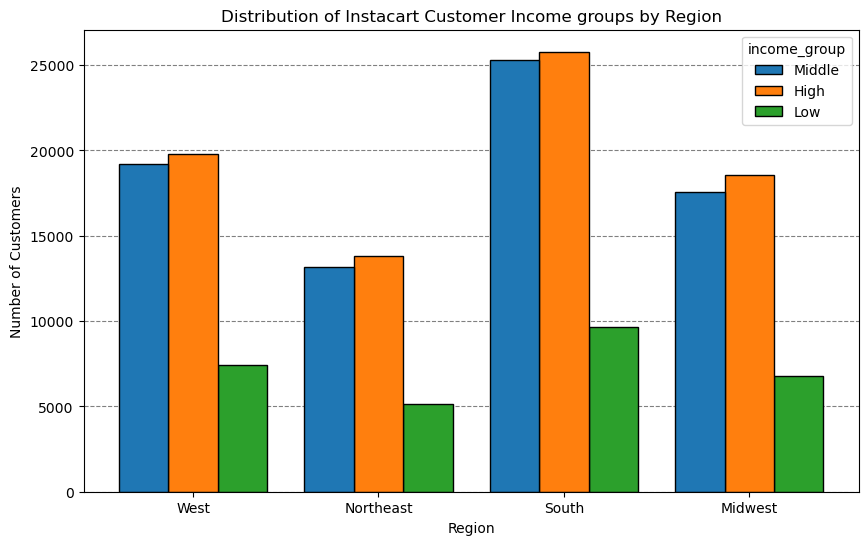

In [121]:
# A histogram could work to show the count of customers in each income group by region

plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='income_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Instacart Customer Income groups by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(output_path_3, bbox_inches = 'tight')
plt.show()

In [122]:
# Check above graph using crosstab

pd.crosstab(user_sample['income_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
income_group,,,,
High,18578,13803,25784,19764
Low,6766,5135,9670,7433
Middle,17591,13186,25297,19216


# 8.1.2. Age Groups

In [124]:
# Define the path for saving the plot

output_path_4 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_age_by_region.png')

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


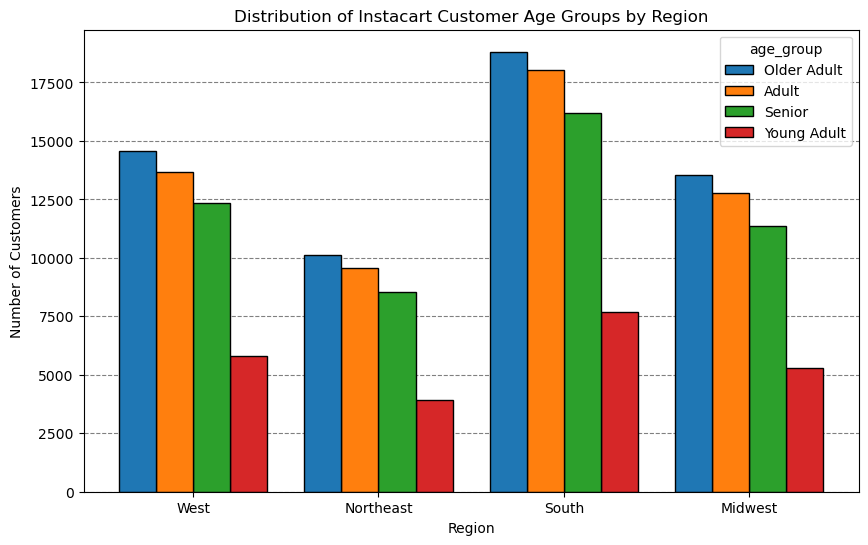

In [125]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='age_group', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Instacart Customer Age Groups by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(output_path_4, bbox_inches = 'tight')
plt.show()

In [126]:
# Check above graph using crosstab

pd.crosstab(user_sample['age_group'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
age_group,,,,
Adult,12758,9580,18038,13676
Older Adult,13536,10121,18815,14573
Senior,11353,8520,16200,12351
Young Adult,5288,3903,7698,5813


# 8.1.3. Dependants

In [127]:
# Define the path for saving the plot

output_path_5 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_dependants_by_region.png')

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


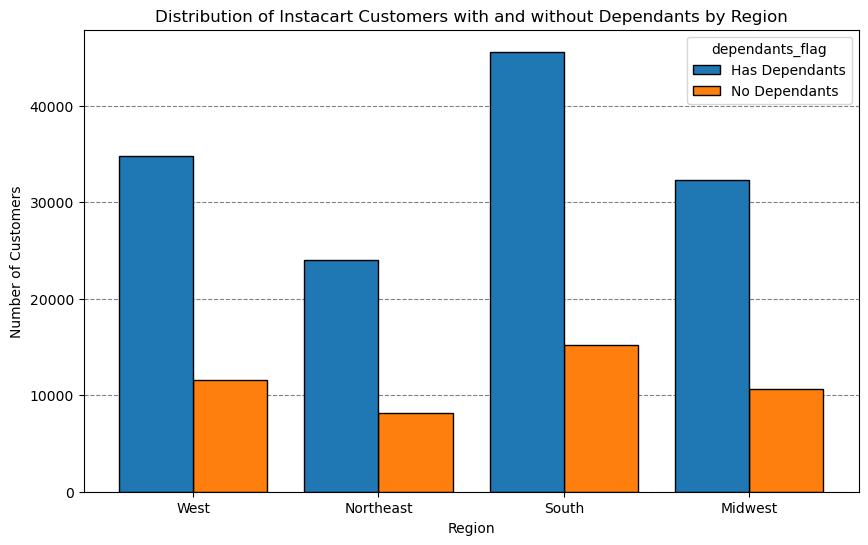

In [128]:
plt.figure(figsize=(10, 6))
# Plot the histogram bars
sns.histplot(data=user_sample, x='region', hue='dependants_flag', multiple='dodge', shrink=.8, alpha=1)
# Overlay a grid behind the bars
plt.gca().set_axisbelow(True)  # Ensure grid is behind bars
plt.grid(axis='y', color='gray', linestyle='dashed')
# General formatting
plt.title('Distribution of Instacart Customers with and without Dependants by Region')
plt.ylabel('Number of Customers')
plt.xlabel('Region')
# Save and show
plt.savefig(output_path_5, bbox_inches = 'tight')
plt.show()

In [129]:
# Check above graph using crosstab

pd.crosstab(user_sample['dependants_flag'], user_sample['region'], dropna = False)

region,Midwest,Northeast,South,West
dependants_flag,,,,
Has Dependants,32256,23984,45578,34824
No Dependants,10679,8140,15173,11589


# 8.2. Profiles by Department Sales

# 8.2.1. Income Groups

In [131]:
# Define the path for saving the plot

output_path_6 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_top_departments_by_income_group.png')

In [65]:
# Group by income_group and department, count occurrences, and sort
income_department_counts = full_data.groupby(['income_group', 'department']).size().reset_index(name='counts')
income_department_counts.sort_values(by=['income_group', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
colors = plt.cm.viridis(np.linspace(0, 2, 8))  # Sets colour palette

# Define the desired order of income groups
desired_order = ['High', 'Middle', 'Low']


# Get the top 5 departments for each income group
top_departments = []
for income_group in desired_order:
    top_departments.extend(income_department_counts[income_department_counts['income_group'] == income_group].head(5)['department'].tolist())

# Keep unique departments in order
top_departments = list(dict.fromkeys(top_departments))

# Prepare the data for plotting
plot_data = income_department_counts[income_department_counts['department'].isin(top_departments)]
plot_data = plot_data.pivot(index='department', columns='income_group', values='counts').fillna(0)
plot_data = plot_data.reindex(top_departments)

# Create the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 10))

# Define colors
colors = plt.cm.viridis(np.linspace(0, 1, 3))

# Plot bars
bar_width = 0.25
indices = np.arange(len(top_departments))
for i, income_group in enumerate(desired_order):
    ax.bar(indices + i * bar_width, plot_data[income_group], width=bar_width, color=colors[i], label=income_group)

# Set chart labels and title
ax.set_xlabel('Department')
ax.set_ylabel('Total Products Sold')
ax.set_title('Top 5 Departments for High, Middle, and Low Earners')
ax.set_xticks(indices + bar_width)
ax.set_xticklabels(top_departments, rotation=45)
ax.legend(title='Income Group')

# Save the plot
plt.tight_layout()
plt.savefig(output_path_6, bbox_inches='tight')
plt.show()


NameError: name 'full_data' is not defined

# 8.2.2. Age Groups

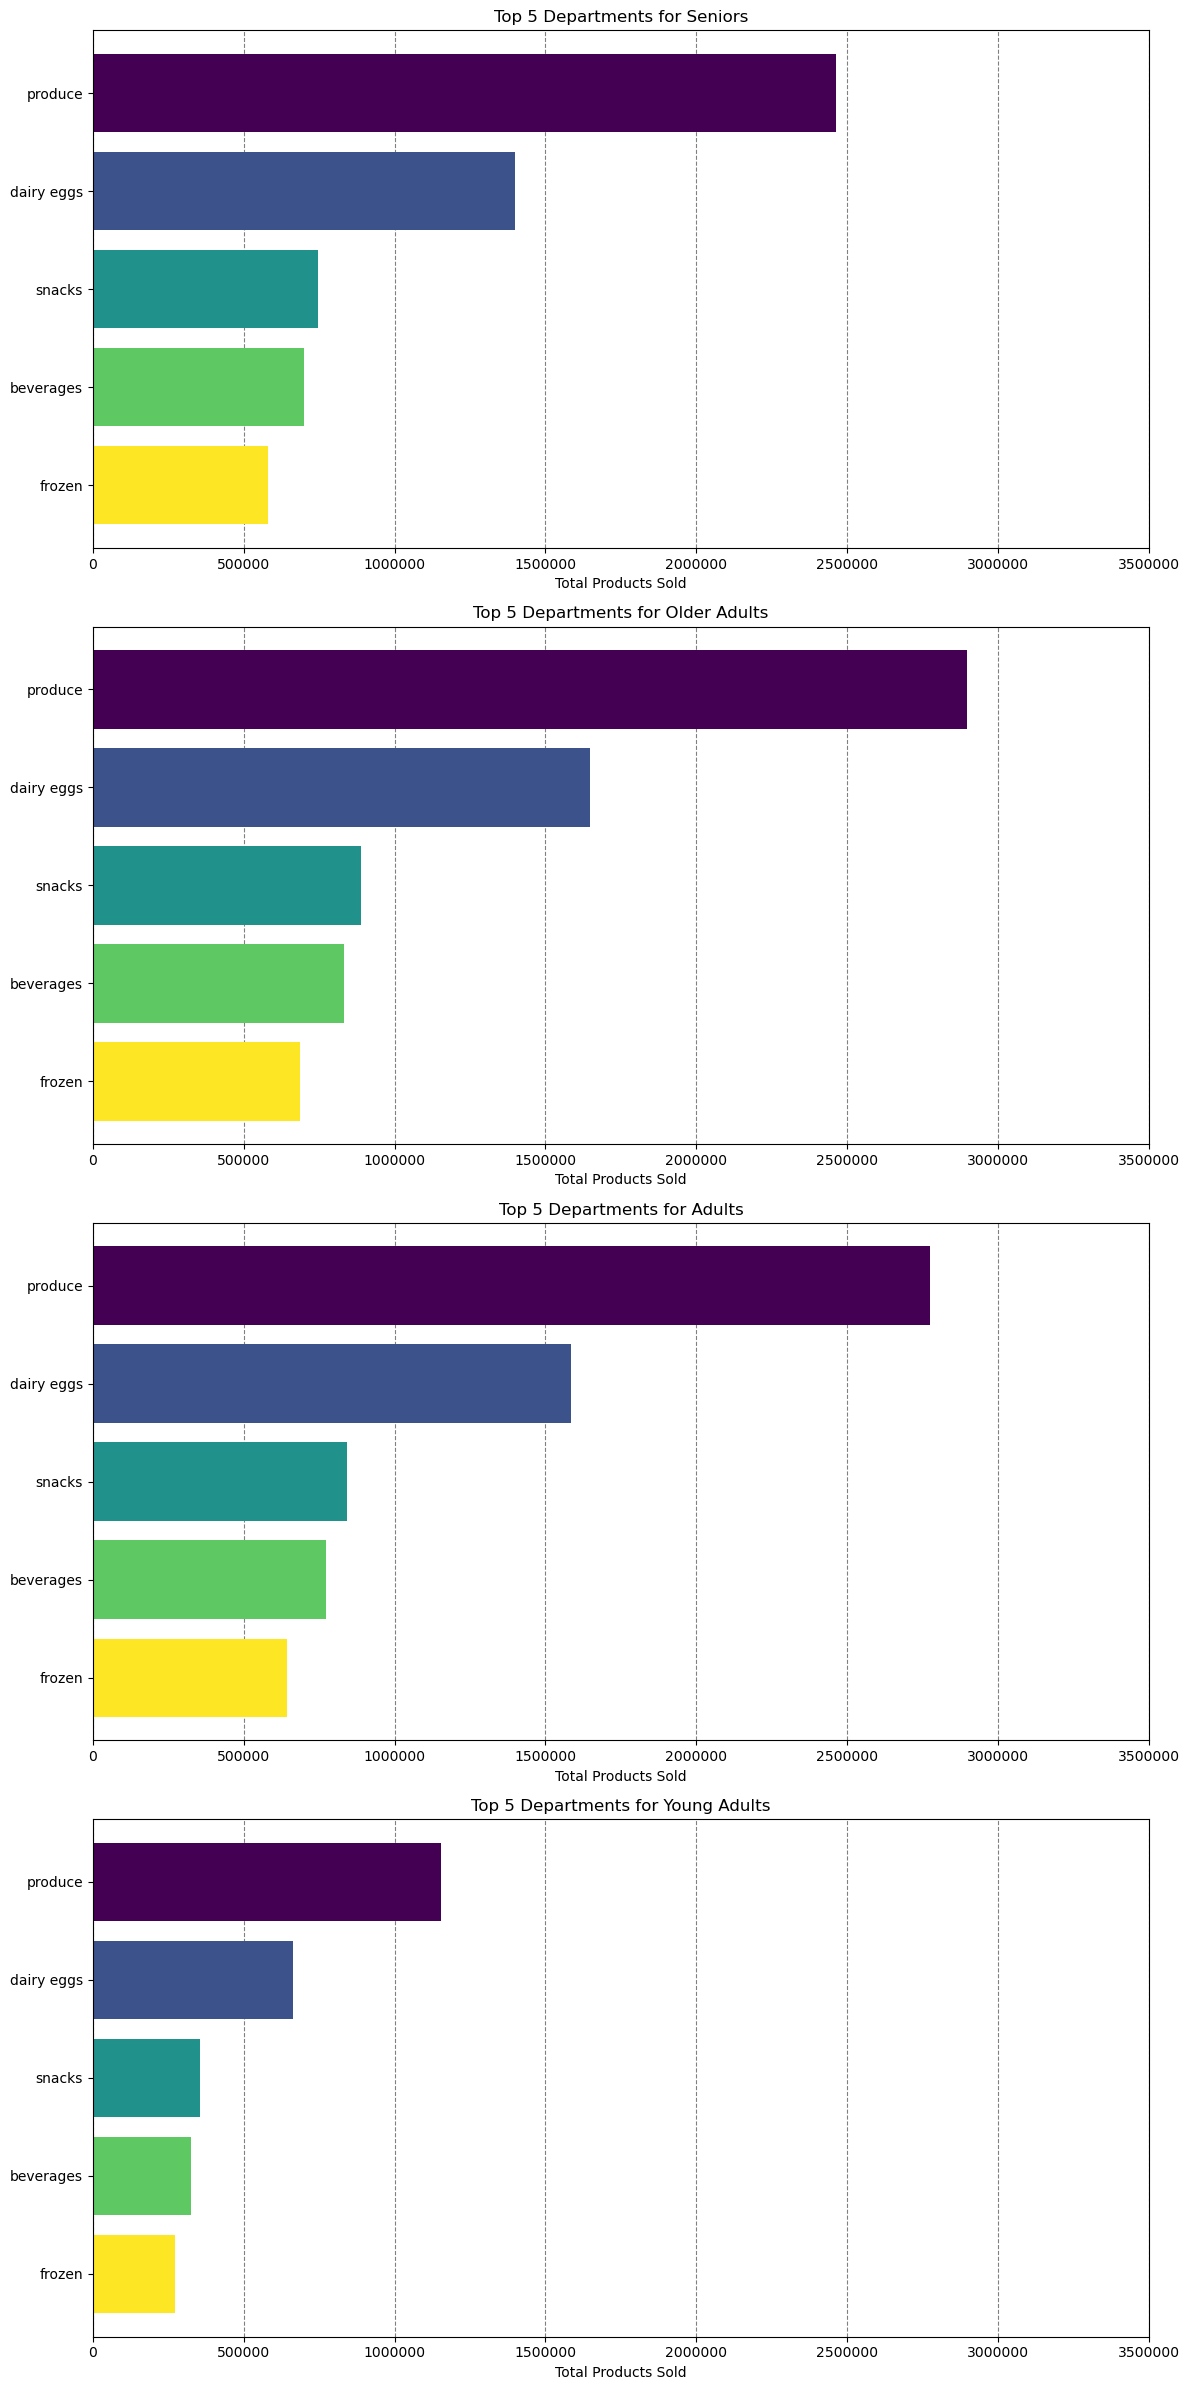

In [183]:
# plotting code
fig, axs = plt.subplots(4, 1, figsize=(12, 24))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets color palette

# Define the path for saving the plot
output_path_16 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_customer_profile_top_departments_by_age_group.png')

# Define the desired order of age groups
desired_age_order = ['Senior', 'Older Adult', 'Adult', 'Young Adult']

# Iterate over each age group and create a horizontal bar chart
for i, age_group in enumerate(desired_age_order):
    age_data = age_department_counts[age_department_counts['age_group'] == age_group].nlargest(5, 'counts')
    
    if age_data.empty:
        print(f"No data for {age_group}")  # Debugging statement
        continue  # Skip plotting if there is no data for the age group
    
    ax = axs[i]
    ax.barh(age_data['department'], age_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {age_group}s')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 3500000)  # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(output_path_16, bbox_inches='tight')
plt.show()

# 8.2.3. Dependants

In [141]:
# Define the path for saving the plot

output_path_8 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_top_departments_by_dependants.png')

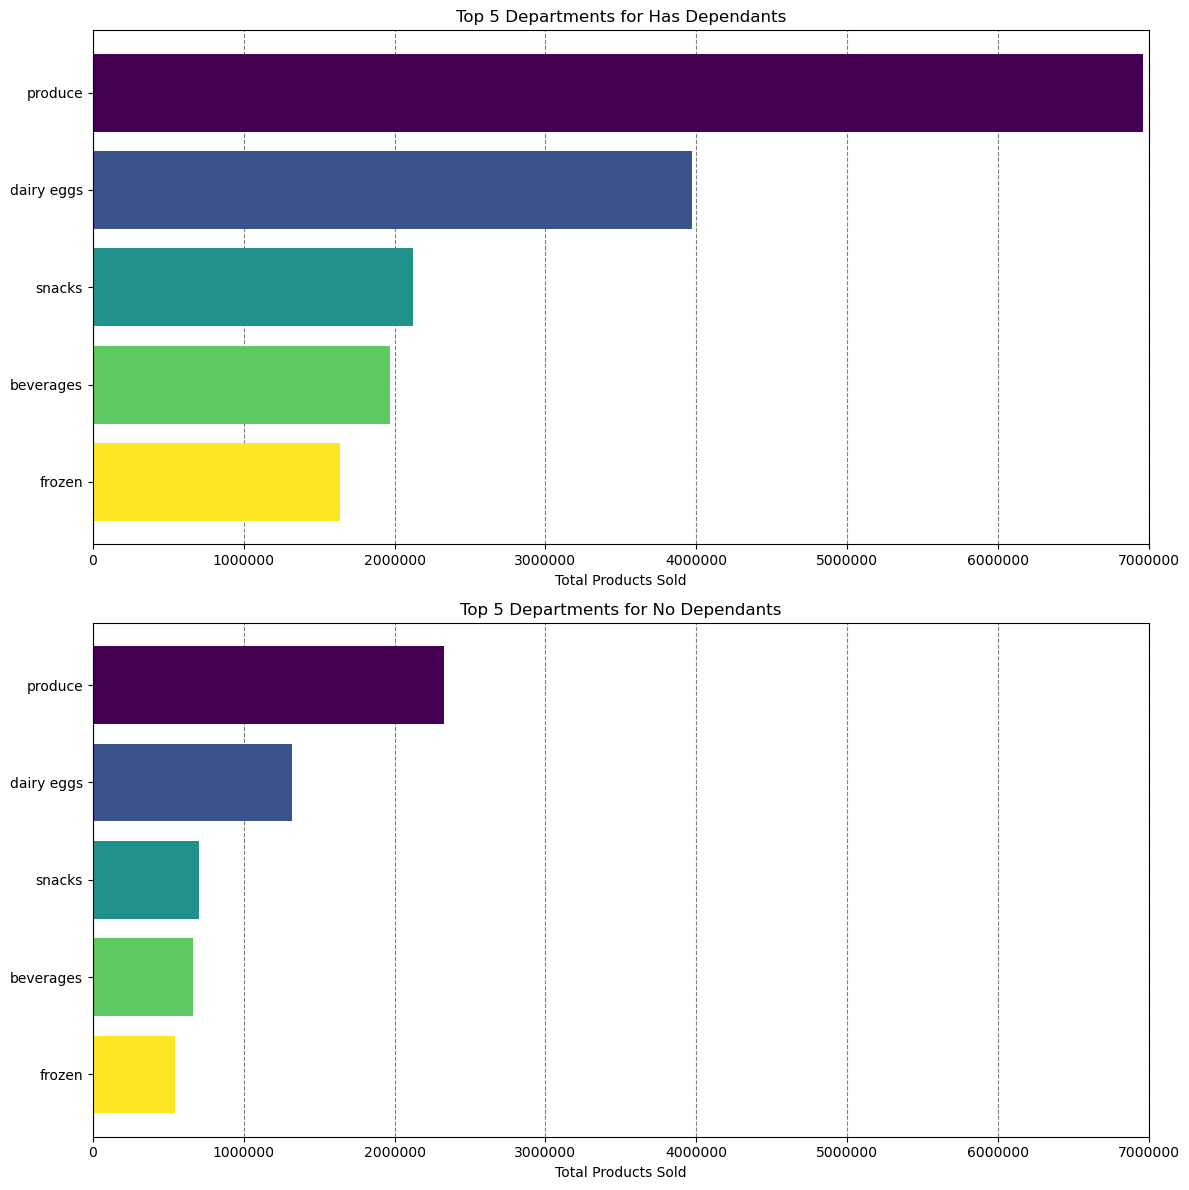

In [142]:
# Group by dependants_flag and department, count occurrences, and sort
dependants_department_counts = full_data.groupby(['dependants_flag', 'department']).size().reset_index(name='counts')
dependants_department_counts.sort_values(by=['dependants_flag', 'counts'], ascending=False, inplace=True)

# Create subplots and color scheme
fig, axs = plt.subplots(2, 1, figsize=(12, 12))
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Sets colour palette

# Define the desired order of age groups
dependants_order = ['Has Dependants', 'No Dependants']

# Iterate over both dependants_flags and create a horizontal bar chart
for i, dependants_status in enumerate(dependants_order):
    dependants_data = dependants_department_counts[dependants_department_counts['dependants_flag'] == dependants_status].head(5)
    ax = axs[i]
    ax.barh(dependants_data['department'], dependants_data['counts'], color=colors, zorder=2)
    ax.set_title(f'Top 5 Departments for {dependants_status}')
    ax.set_xlabel('Total Products Sold')
    ax.set_xlim(0, 7000000) # Keep x-axis range consistent for comparisons
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_ylabel('')
    ax.invert_yaxis()  # Invert y-axis to have the highest count at the top
    ax.grid(axis='x', color='gray', linestyle='dashed')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.savefig(output_path_8, bbox_inches = 'tight')
plt.show()

# 9. Visualisations

# 10. Export Final Data Set

In [171]:
# Define the path for saving the full_data dataframe

full_data_output_path = r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\02 Data\Prepared Data\instacart_full_data.pkl'

In [173]:
# Export the full_data DataFrame as a pickle file

full_data.to_pickle(full_data_output_path)

# 11. Supplementary Analysis

# 11.1. Are there certain types of products that are more popular than others?

In [143]:
# Define the path for saving the plot

output_path_9 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'Instacart_department_sales.png')

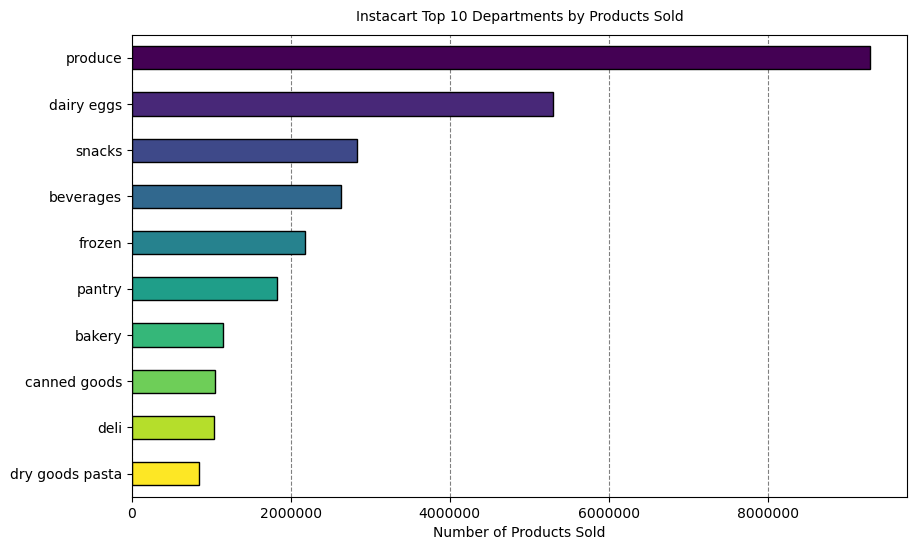

In [144]:
colors = plt.cm.viridis(np.linspace(0, 1, 10)) # Sets colour palette

fig, ax = plt.subplots(figsize = (10, 6))
plt.ticklabel_format(style='plain')

full_data['department'].value_counts().sort_values(ascending = False).head(10).plot.barh(color = colors, 
                                                                                        zorder = 2, 
                                                                                        edgecolor = 'black')
plt.title('Instacart Top 10 Departments by Products Sold', size=10, pad=10)
plt.xlabel('Number of Products Sold', )
plt.ylabel('')
plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.invert_yaxis()
plt.savefig(output_path_9, bbox_inches = 'tight')

In [145]:
# A simple frequency count to show all departments may also provide useful insights

# Some departments may benefit from a boost in marketing

full_data['department'].value_counts(dropna=False)

department
produce            9288860
dairy eggs         5292745
snacks             2829767
beverages          2633114
frozen             2180787
pantry             1831123
bakery             1147983
canned goods       1041171
deli               1028707
dry goods pasta     845368
household           720087
meat seafood        692678
breakfast           687659
personal care       436395
babies              417536
international       262920
alcohol             149309
pets                 95470
missing              67034
other                35403
bulk                 34011
Name: count, dtype: int64

# 11.2. Are there differences in ordering habits based on a customer's loyalty status?

In [146]:
# Compute average order_total

loyalty_avg_order_total = orders_subset.groupby('order_frequency_flag')['order_total'].mean().sort_values(ascending = False).reset_index()

In [147]:
# Check

loyalty_avg_order_total

,order_frequency_flag,order_total
0,Regular customer,120.410019
1,Frequent customer,113.418388
2,Non-frequent customer,103.984795


In [148]:
# Define the path for saving the plot

output_path_10 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_average_order_by_loyalty.png')

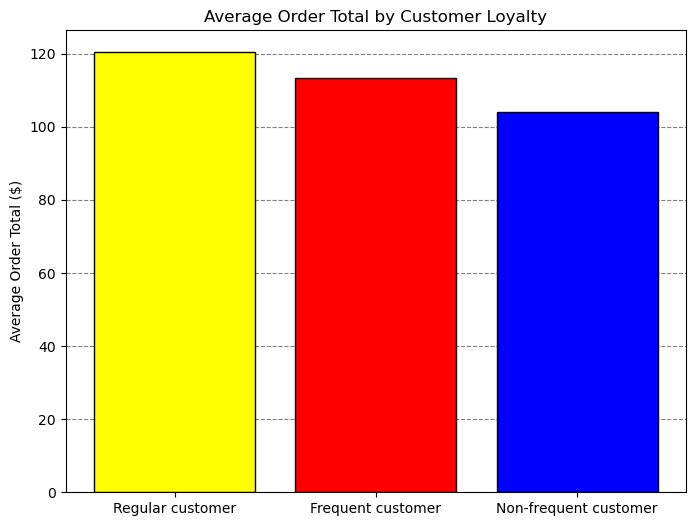

In [149]:
# Set up formatting and colours
plt.figure(figsize=(8, 6))
colors = ['yellow', 'red', 'blue']

# Plot bars
bars = plt.bar(loyalty_avg_order_total['order_frequency_flag'], loyalty_avg_order_total['order_total'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Order Total by Customer Loyalty")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(output_path_10, bbox_inches = 'tight')

In [150]:
# Compute average price of products bought

product_avg_cost = full_data.groupby('order_frequency_flag')['prices'].mean().sort_values(ascending = False).reset_index()

In [151]:
# Check

product_avg_cost

,order_frequency_flag,prices
0,Regular customer,12.590334
1,Non-frequent customer,12.202394
2,Frequent customer,11.743328


In [152]:
# Define the path for saving the plot

output_path_11 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_average_product_price_by_loyalty.png')

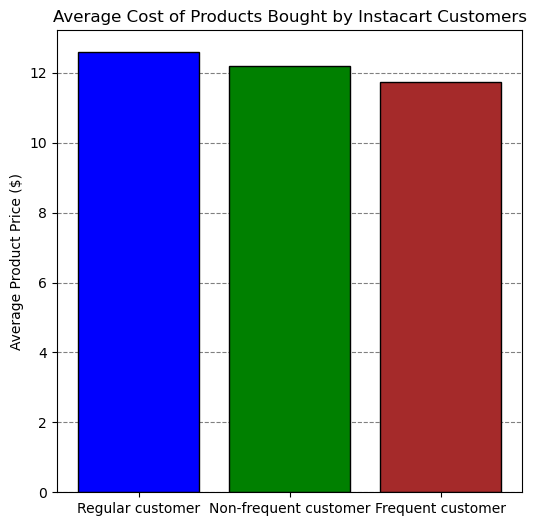

In [153]:
# Set up formatting and colours
plt.figure(figsize=(6, 6))
colors = ['blue', 'green', 'brown']

# Plot bars
bars = plt.bar(product_avg_cost['order_frequency_flag'], product_avg_cost['prices'], color=colors, edgecolor='black', zorder=2)
plt.title("Average Cost of Products Bought by Instacart Customers")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Product Price ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(output_path_11, bbox_inches = 'tight')

# 11.3. "Are there differences in ordering habits based on a customer's region"?

In [154]:
# Define the path for saving the plot

output_path_12 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_total_orders_by_region.png')

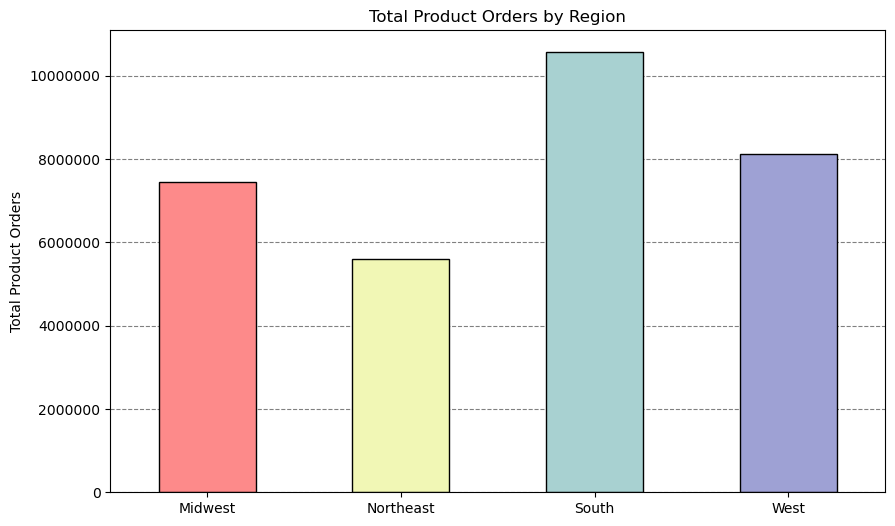

In [155]:
# Set up formatting
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')

# Plot bars
full_data['region'].value_counts().sort_index().plot.bar(color = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4'],
                                                         edgecolor='black', 
                                                         zorder=2, 
                                                         alpha = 1)
plt.title("Total Product Orders by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Total Product Orders")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(output_path_12, bbox_inches = 'tight')

In [156]:
# Compute average order_total

region_avg_order_total = orders_subset.groupby('region')['order_total'].mean().sort_values(ascending = False).reset_index()

In [157]:
# Check

region_avg_order_total

,region,order_total
0,Midwest,121.721336
1,South,115.668350
2,Northeast,110.082024
3,West,107.782494


In [159]:
# Define the path for saving the plot

output_path_13 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_average_order_by_region.png')

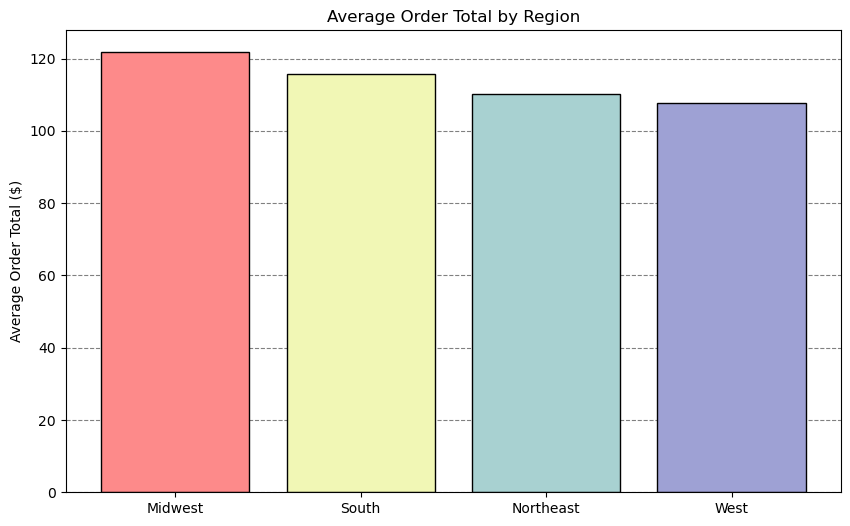

In [160]:
# Set up formatting
plt.figure(figsize=(10, 6))

# Plot bars
bars = plt.bar(region_avg_order_total['region'], 
               region_avg_order_total['order_total'], 
               color = ['#FD8A8A', '#F1F7B5', '#A8D1D1', '#9EA1D4'],
               edgecolor='black', 
               zorder=2, 
               alpha = 1)
plt.title("Average Order Total by Region")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("Average Order Total ($)")
plt.grid(axis = 'y', color = 'grey', linestyle = 'dashed')
plt.savefig(output_path_13, bbox_inches = 'tight')

# 11.4. What differences can you find in ordering habits of different customer profiles?

In [161]:
# Sort income groups by the mean of the order_total (keep in mind this is a multilevel index)

sorted_df = aggregations_by_income_cat.sort_values(by=('order_total', 'mean'), ascending=False)

In [162]:
# Check

sorted_df

days_since_last_order                  order_total              \
                               min       mean   max         min        mean   
income_group                                                                  
High                           0.0  10.550841  30.0         0.0  164.953522   
Middle                         0.0  10.592488  30.0         0.0   82.965019   
Low                            0.0  11.412554  30.0         0.0   49.312019   

                             
                        max  
income_group                 
High          100452.906250  
Middle        100264.695312  
Low              875.000000

In [163]:
# Define the path for saving the plot

output_path_14 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_average_order_amount_by_income.png')

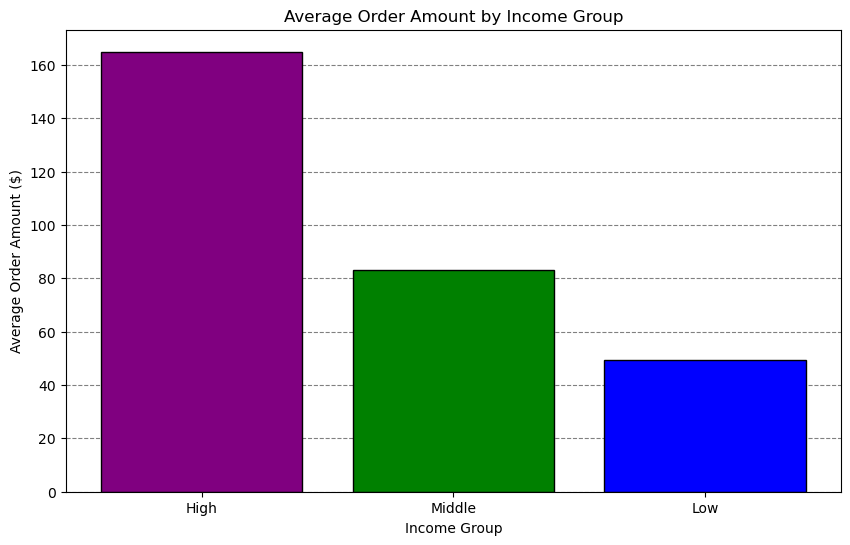

In [164]:
# Make bar chart for average order total
plt.figure(figsize=(10, 6))
plt.bar(sorted_df.index, sorted_df['order_total', 'mean'], color=['purple', 'green', 'blue'], zorder=2, edgecolor='black')
plt.xlabel('Income Group')
plt.ylabel('Average Order Amount ($)')
plt.title('Average Order Amount by Income Group')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.savefig(output_path_14, bbox_inches = 'tight')

# Creating Frequency_flag, merging it in user_sample and then generating cross-tabulation

In [165]:
# Calculate median_days_between_orders for each user
median_days_between_orders = filtered_new_df.groupby('user_id')['days_since_last_order'].median().reset_index(name='median_days_between_orders')

# Merge median_days_between_orders with user_sample DataFrame
user_sample = pd.merge(user_sample, median_days_between_orders, on='user_id', how='left')

# Define frequency_flag based on median_days_between_orders
conditions = [
    (user_sample['median_days_between_orders'] <= 10),
    (user_sample['median_days_between_orders'] > 10) & (user_sample['median_days_between_orders'] <= 20),
    (user_sample['median_days_between_orders'] > 20)
]
choices = ['High', 'Medium', 'Low']

user_sample['frequency_flag'] = pd.cut(user_sample['median_days_between_orders'], bins=[-float('inf'), 10, 20, float('inf')], labels=['High', 'Medium', 'Low'])

# Generate cross-tabulation
crosstab1 = pd.crosstab(user_sample['income_group'], user_sample['frequency_flag'], dropna=False)

print(crosstab1)

frequency_flag   High  Medium    Low
income_group                        
High            40344   23256  14329
Low             13294    8907   6803
Middle          38373   22546  14371


In [166]:
# Check

crosstab1

frequency_flag,High,Medium,Low
income_group,,,
High,40344,23256,14329
Low,13294,8907,6803
Middle,38373,22546,14371


In [167]:
# Normalise
crosstab1_norm = crosstab1.div(crosstab1.sum(axis=1), axis = 0) * 100
# Check
crosstab1_norm

frequency_flag,High,Medium,Low
income_group,,,
High,51.770201,29.842549,18.387250
Low,45.835057,30.709557,23.455385
Middle,50.966928,29.945544,19.087528


In [168]:
# Define the path for saving the plot

output_path_15 = os.path.join(r'C:\Users\New User\OneDrive\Documents\05-2024 Instacart Basket Analysis\04 Analysis\Visualizations', 'instacart_customer_frequency_by_income.png')

<Figure size 800x1000 with 0 Axes>

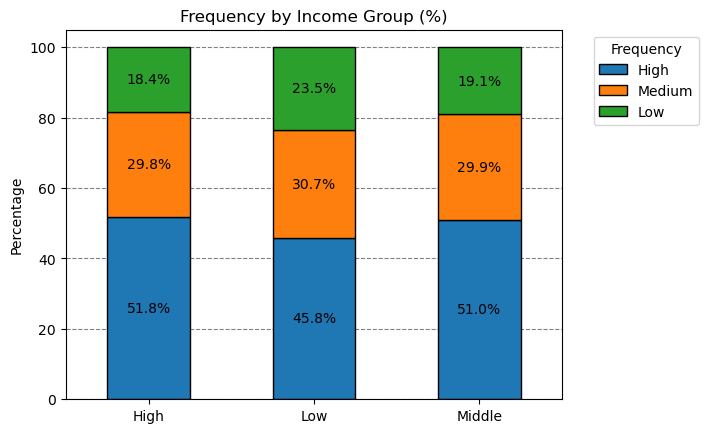

In [169]:
# Graph
plt.figure(figsize=(8, 10)) 
ax = crosstab1_norm.plot(kind='bar', stacked=True, zorder=2, edgecolor='black')

# To show percentages on each section:
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    percentage = f'{height:.1f}%'  # Format as percentage
    ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center')

plt.title('Frequency by Income Group (%)')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.legend(title='Frequency',loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig(output_path_15, bbox_inches = 'tight')